In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import time
import sys
import mat73
import os
import re
from scipy import stats
import shutil
from datetime import datetime

# FOOOF objects and functions
from fooof import FOOOFGroup, FOOOF
from fooof.bands import Bands
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model
from fooof.analysis import get_band_peak_fm, get_band_peak_fg


# RBL functions
from  import_NK_spectra import import_NK_spectra
from  RBL_fooof_fxns import  setup_fooof_dirs, plt_save_fooof_analysis #plt_save_aperiodic_overtime, plt_save_periodic

In [2]:
### RBL inputs into general FOOOF approach below:
dirs = {'raw':       '/Volumes/DBS Pain 3/nk_device_data/processed/fooof_specs (30s_prior_to_survey, updated channels)/',
        'proc':      '/Users/Leriche/pia_server/datastore_spirit/human/nk_device_data/ephy_analysis/spectra/',
        'raw_sub':   '',
        'proc_sub':  'fooofed'}

In [4]:
### RBL inputs into general FOOOF approach below:
fooof_param = pd.DataFrame

fooof_param.freq_range = [2, 40] 

fooof_param.err_thresh = 0.1

## FOOOF alogirthim parameters (directly feed into FOOOF object)
fooof_param.peak_width_limits   = [2.0, 5.0]      # narrowest to widest possible peak width
fooof_param.max_n_peaks         = 4               # max number of peaks to fit
fooof_param.min_peak_height     = 0.1             # min power (db) ABOVE flattened spectrum to be considered a peak
fooof_param.peak_threshold      = 2               # min std(s) above flattened spectrum to be considered a peak
fooof_param.aperiodic_mode      ='knee'           # 'fixed' = 1/(f^x), but 'knee' = 1/(k + f^x)--the latter fits inflection point in the aperiodic fit

RCS02
['RVPN 3-1']
(1, 106, 298)
(298,)


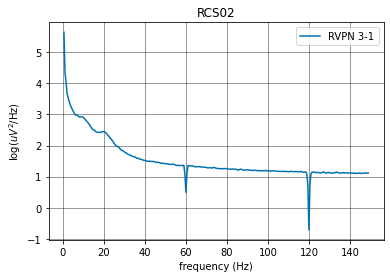

Running FOOOFGroup across 88 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


RCS04
['LACC 5-3', 'RACC 5-3', 'LACC 5-4', 'RACC 5-4']
(4, 142, 298)
(298,)


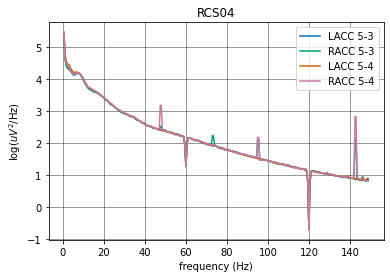

Running FOOOFGroup across 111 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 111 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 111 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 111 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


See:   /Users/Leriche/pia_server/datastore_spirit/human/nk_device_data/ephy_analysis/spectra//RCS04/fooofed (knee)/error_ge_0.1/
for spectra with model error >0.1
RCS05
['LACC 3-2', 'RINS 8-6', 'LACC 3-1', 'RINS 10-7']
(4, 244, 298)
(298,)


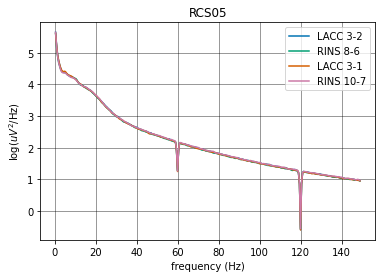

Running FOOOFGroup across 196 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 196 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 196 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 196 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


See:   /Users/Leriche/pia_server/datastore_spirit/human/nk_device_data/ephy_analysis/spectra//RCS05/fooofed (knee)/error_ge_0.1/
for spectra with model error >0.1
RCS06
['LCM 6-5', 'RACCa 7-6', 'LCM 7-6']
(3, 304, 298)
(298,)


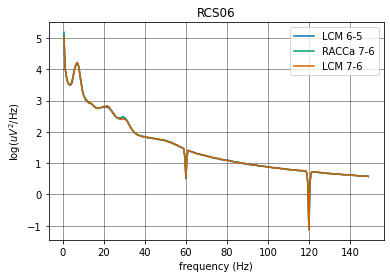

Running FOOOFGroup across 228 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 228 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 228 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


RCS07
['LSGC 3-2', 'RSGC 2-1', 'RSGC 3-1']
(3, 236, 298)
(298,)


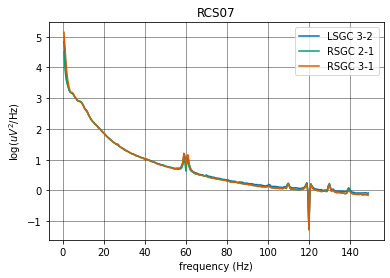

Running FOOOFGroup across 207 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 207 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


Running FOOOFGroup across 207 power spectra.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


In [5]:
pts = ['RCS02', 'RCS04', 'RCS05', 'RCS06', 'RCS07']

#pts = ['RCS02']


for i in range(len(pts)):
    
    raw_pwrspectra, fft_bins_inHz, ch_names, arm1_df = import_NK_spectra(pts[i], dirs)

    setup_fooof_dirs(pts[i], dirs, fooof_param)

    t_peri_ephy     = arm1_df.scales_vasmpq_timestamp
    i_keep          = [pd.isnull(t) == 0 for t in t_peri_ephy] 
    t_peri_ephy     = pd.to_datetime(t_peri_ephy.iloc[i_keep]).reset_index()
    t_peri_ephy     = t_peri_ephy.scales_vasmpq_timestamp

    ind_sense_chan = range(len(ch_names))

    for i_ch in ind_sense_chan:
        spectra_oi = raw_pwrspectra[i_ch, i_keep, :]

        # FOOOF all spectra individually in single run
        fg = FOOOFGroup(
                        peak_width_limits  = fooof_param.peak_width_limits, 
                        max_n_peaks        = fooof_param.max_n_peaks, 
                        min_peak_height    = fooof_param.min_peak_height,
                        peak_threshold     = fooof_param.peak_threshold,
                        aperiodic_mode     = fooof_param.aperiodic_mode)

        # Model the power spectrum with FOOOF
        fg.fit(fft_bins_inHz, spectra_oi, fooof_param.freq_range)

        ### save aperiodic parameters, plot corr(aperiodic, time)
        plt_save_fooof_analysis(pts[i], dirs, ch_names[i_ch],
                                    fooof_param,
                                    t_peri_ephy, fg)

        ### only needed once per loop   
        if i_ch ==3:
            pd.DataFrame(fg.freqs).to_excel(dirs['fooof_data'] + 'fooof_freqs.xlsx', index=False)
            print('See:   ' + dirs['error'] + '\nfor spectra with model error >' +  str(fooof_param.err_thresh))